# Heart Disease Prediction

 **Objective**
 
The goal of this project is to build a machine learning model that can predict whether a person is at risk of heart disease based on medical and health-related features.

  **Dataset**
  
Heart Disease UCI Dataset (Downloaded from Kaggle)

  **Workflow**
  
- Data Loading
- Data Cleaning
- Exploratory Data Analysis (EDA)
- Feature Selection
- Model Training (Logistic Regression)
- Model Evaluation (Accuracy, Confusion Matrix, ROC Curve)
- Feature Importance Analysis
- Conclusion


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**1. Loading the Dataset**

In this step, we load the Heart Disease UCI dataset from a CSV file into a pandas DataFrame.


In [15]:
df = pd.read_csv("heart_disease_uci.csv")
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


*Explanation of **dataset** output*

The command pd.read_csv("heart_disease_uci.csv") loads the heart disease dataset into a DataFrame called df.The function df.head() displays the first 5 rows of the dataset to preview the data.Each row represents one patient, and each column represents a medical feature of that patient.Columns like age, sex, cp, trestbps, and chol show personal and medical measurements.The column num is the target column, which indicates the level of heart disease (0 means no disease, values > 0 mean disease is present).The output confirms that the dataset is loaded correctly and shows the structure and types of features available for analysis.This preview helps us understand what data we will clean, analyze, and use to train the prediction model.


 **2. Understanding the Data**

Here we explore the basic structure of the dataset:
- Number of rows and columns
- Data types of each column
- Check for missing values


In [16]:
df.shape


(920, 16)

*Explanation of **df.shape** output*

The command df.shape shows the size of the dataset, and the output (920, 16) means the dataset contains 920 rows and 16 columns. In other words, there are records for 920 patients and 16 different features for each patient.



In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


*Explanation of **df.info()** output*


The df.info() output gives a summary of the dataset, showing that it contains 920 entries and 16 columns with different data types such as integers, floats, and objects (text). It also shows the non-null count for each column, which means some columns like ca, thal, slope, and others have missing values, while columns like id, age, and num are complete with no missing data.


In [18]:
df.isnull().sum()


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

*Explanation of **df.isnull().sum()** output*


The output of df.isnull().sum() shows the number of missing values in each column of the dataset. It tells us that some columns like id, age, sex, dataset, cp, and num have no missing values, while other columns such as trestbps, chol, fbs, thalch, oldpeak, slope, ca, and thal contain many missing values (for example, ca has 611 and thal has 486 missing entries). This means the dataset needs data cleaning before training a machine learning model, either by filling these missing values or removing the affected rows.



 **3. Data Cleaning**

We check for missing values and handle them if necessary.
For simplicity, we remove rows with missing values (if any).


In [19]:
df = df.dropna()


 **4. Exploratory Data Analysis (EDA)**

EDA helps us understand the dataset using visualizations:
- Distribution of the target variable
- Distribution of age
- Correlation between features


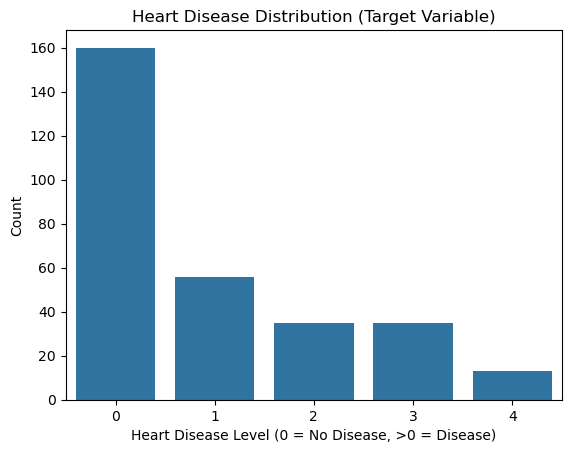

In [20]:
sns.countplot(x="num", data=df)
plt.title("Heart Disease Distribution (Target Variable)")
plt.xlabel("Heart Disease Level (0 = No Disease, >0 = Disease)")
plt.ylabel("Count")
plt.show()


*Explanation of **(EDT)** Target Variable output*

This bar chart shows the distribution of the target variable (heart disease level) in the dataset. The value 0 has the highest count, which means most patients do not have heart disease, while values 1 to 4 represent different levels of disease and have fewer patients. This tells us that the dataset is imbalanced, with more healthy cases than diseased cases, and it also shows how many patients fall into each disease severity level.


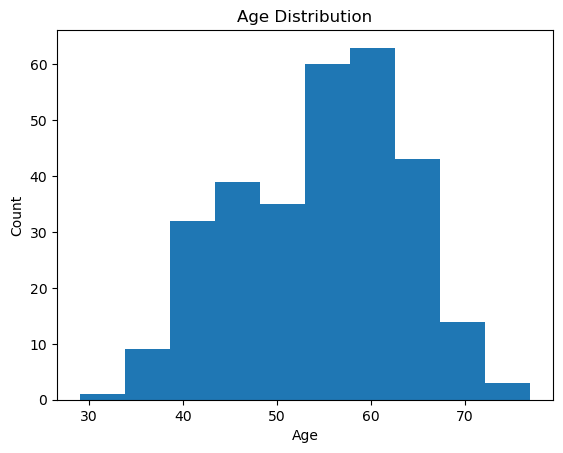

In [21]:
plt.hist(df["age"], bins=10)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()


*Explanation of **(EDT)** Age Distribution output*

This histogram shows the age distribution of patients in the dataset. Most patients fall in the middle-age to older range (around 40 to 65 years), with the highest number of patients around the 50–60 age group. Very few patients are very young or very old, which means the dataset is mainly focused on middle-aged and elderly people, who are more likely to be at risk of heart disease.


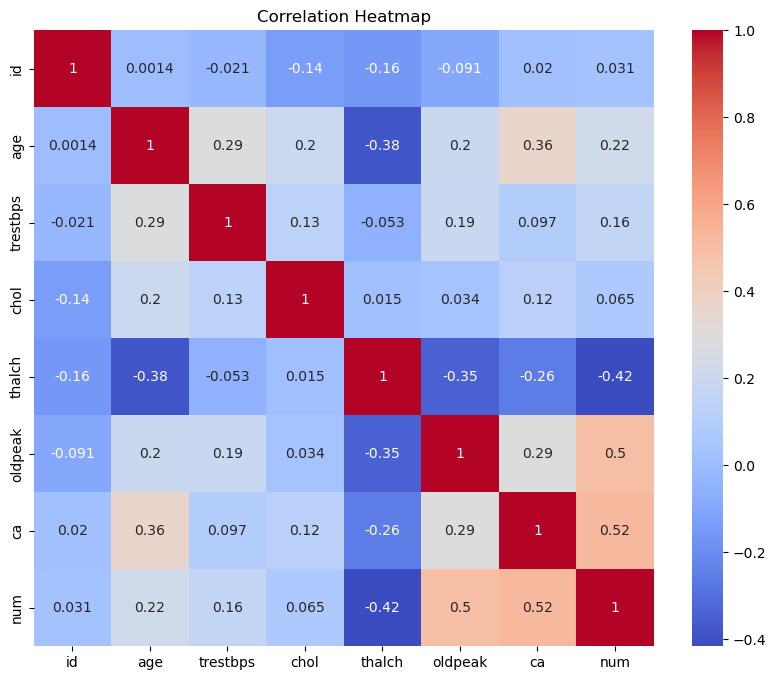

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


*Explanation of **(EDT)** Correlation Heatmap output*

This heatmap shows the correlation (relationship) between all numeric features in the dataset. Each square (cell) shows how strongly two variables are related to each other, and the color tells the strength and direction of the relationship (warm colors = positive correlation, cool colors = negative correlation, and light colors = weak or no correlation). The numbers written inside the cells are the correlation values between -1 and +1. From this graph, you can easily see which features are strongly related to the target (num) and which features are related to each other, helping you understand which features may be important for prediction and which ones might be redundant.

 **5. Feature Selection**

We separate the input features (X) and the target variable (y).
The target column in this dataset is `num`.
We convert it into a binary classification problem:
- 0 = No heart disease
- 1 = Heart disease present


In [23]:
# Convert target to binary (0 = no disease, 1 = disease)
df["target"] = df["num"].apply(lambda x: 0 if x == 0 else 1)

# Drop unnecessary columns
X = df.drop(["num", "target", "id", "dataset"], axis=1)
y = df["target"]

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

X.head()


,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145.0,233.0,150.0,2.3,0.0,True,False,False,True,True,False,False,False,False,False,False,False
1,67,160.0,286.0,108.0,1.5,3.0,True,False,False,False,False,False,False,True,True,False,True,False
2,67,120.0,229.0,129.0,2.6,2.0,True,False,False,False,False,False,False,True,True,False,False,True
3,37,130.0,250.0,187.0,3.5,0.0,True,False,True,False,False,True,False,False,False,False,True,False
4,41,130.0,204.0,172.0,1.4,0.0,False,True,False,False,False,False,False,False,False,True,True,False


*Explanation of **(EDT)** table output*

This table shows the final input features (X) that will be given to the machine learning model. The original text (categorical) columns like sex, cp, restecg, slope, and thal have been converted into numeric (True/False) columns using one-hot encoding, because machine learning models cannot work directly with text. Each row still represents one patient, but now every feature is in a numeric or boolean form that the model can understand. For example, sex_Male = True means the patient is male, and cp_atypical angina = True means the patient has that chest pain type. The numeric columns like age, trestbps, chol, thalch, oldpeak, and ca remain as numbers. In short, this output shows that your dataset is now clean, numeric, and ready to be used for training the machine learning model.

 **6. Train-Test Split**

We split the dataset into:
- 80% training data
- 20% testing data


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


 **7. Model Training**

We use Logistic Regression, which is a commonly used algorithm for binary classification problems.


In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


*Explanation of **Model Training** output*

This screen shows the settings of your Logistic Regression model that is used to predict heart disease in your task. These parameters control how the model is trained, and the copy buttons are only there to help you copy values easily for notes or code. The important one you changed is max_iter = 1000, which helps the model train properly without errors.


 **8. Making Predictions**

We use the trained model to make predictions on the test data.


In [26]:
y_pred = model.predict(X_test)


 **9. Model Evaluation**

We evaluate the model using:
- Accuracy
- Confusion Matrix
- ROC Curve


In [27]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.9166666666666666


*Explanation of **Model Evaluation** Accuracy output*

This value shows the percentage of correct predictions by the model.
0.9166 means the model's predictions are 91.66% accurate.

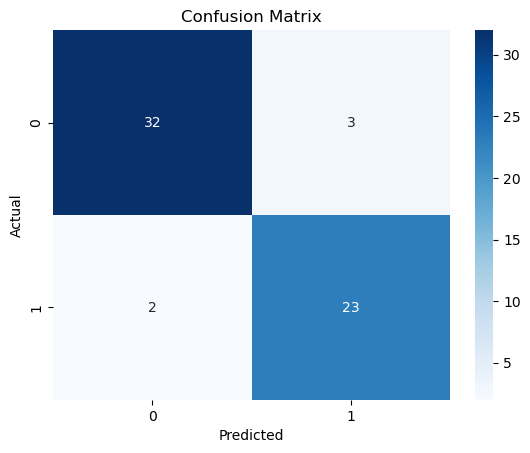

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


*Explanation of **Model Evaluation** Confusion Matrix output*

The confusion matrix shows how well the model predicted heart disease. The top-left (32) and bottom-right (23) numbers are correct predictions: 32 patients correctly predicted as healthy and 23 correctly predicted as having heart disease. The top-right (3) and bottom-left (2) are errors: 3 healthy patients predicted as having disease (false positives) and 2 patients with disease predicted as healthy (false negatives). Overall, the model predicted 55 out of 60 cases correctly, which matches the accuracy of 91.66%.

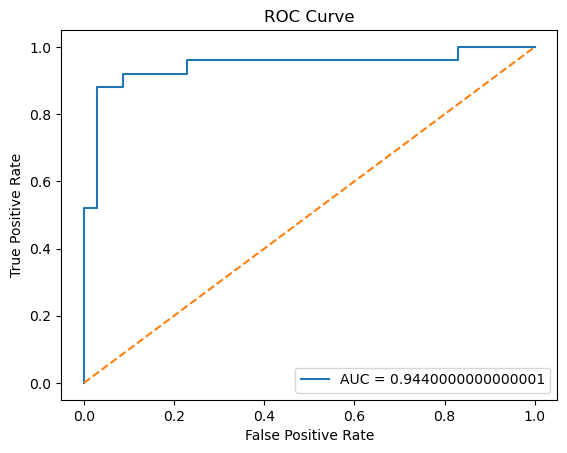

In [29]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="AUC = " + str(roc_auc))
plt.plot([0, 1], [0, 1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


*Explanation of **Model Evaluation** ROC Curve output*

The ROC curve plots the True Positive Rate (sensitivity) against the False Positive Rate (1-specificity) at different classification thresholds. The blue line is your model’s performance, and the orange dashed line represents a random guess (baseline).
Your model’s AUC (Area Under the Curve) is 0.944, which is very high. This means your model is excellent at distinguishing between patients with heart disease and those without it. The closer the curve follows the top-left corner and the higher the AUC (maximum 1.0), the better the model.


 **10. Feature Importance**

We analyze which features have the most influence on the model’s predictions using the coefficients of Logistic Regression.


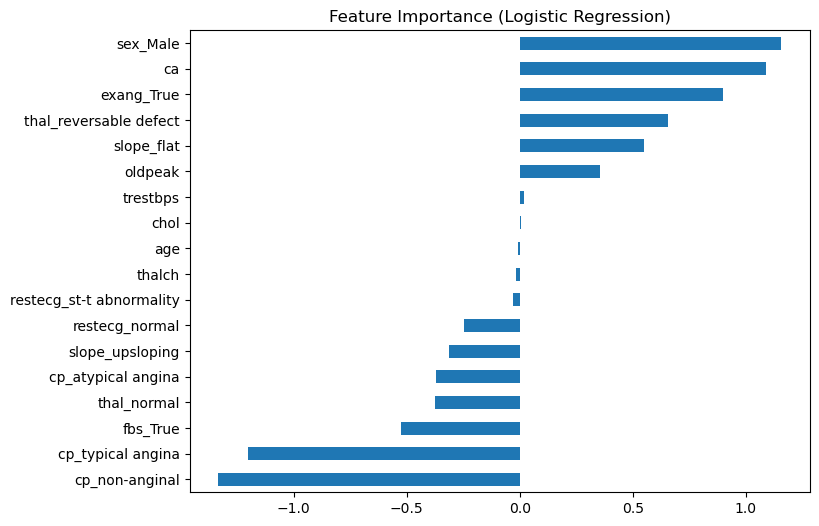

In [30]:

importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values().plot(kind="barh", figsize=(8, 6))
plt.title("Feature Importance (Logistic Regression)")
plt.show()

*Explanation of **Feature Importance** Logistic regression*

This chart shows the feature importance for a Logistic Regression model predicting heart disease. Each horizontal bar represents how much a feature contributes to the prediction. Features with bars to the right (positive values) increase the likelihood of heart disease, while bars to the left (negative values) decrease it. For example, sex_Male, ca (number of major vessels), and exang_True (exercise-induced angina) have the highest positive impact, meaning they are the strongest predictors of heart disease in this model. On the other hand, chest pain types like cp_non-anginal and cp_typical angina have negative coefficients, indicating they reduce the predicted risk. Features with very small bars, like chol or age, have minimal influence.

## 11. Conclusion

In this project, we:
- Loaded and cleaned the Heart Disease UCI dataset
- Performed Exploratory Data Analysis (EDA)
- Prepared the data for machine learning
- Trained a Logistic Regression model
- Evaluated the model using accuracy, confusion matrix, and ROC curve
- Analyzed important features affecting the prediction

This project demonstrates a complete and professional machine learning workflow suitable for an internship-level task.
